<a href="https://colab.research.google.com/github/Ludvins/PAC_Bayes_Chernoff_MLL/blob/main/plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
import pandas as pd
import os

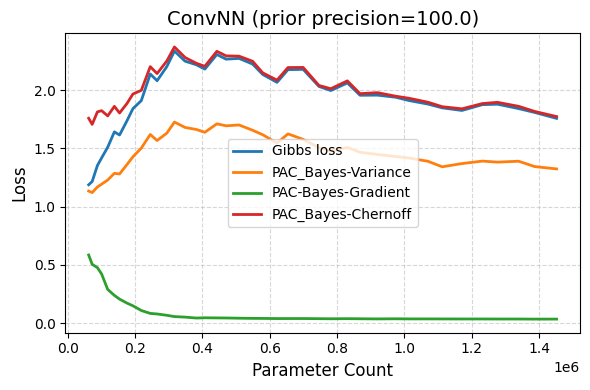

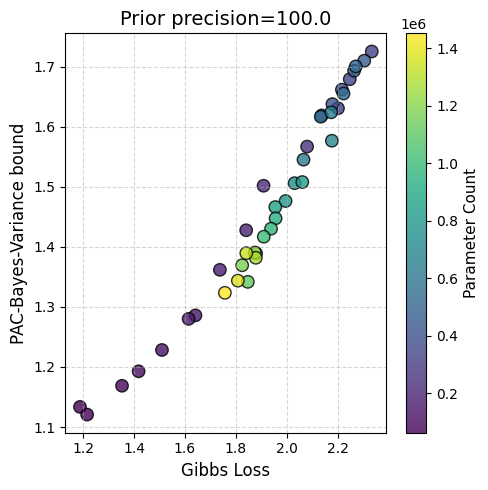

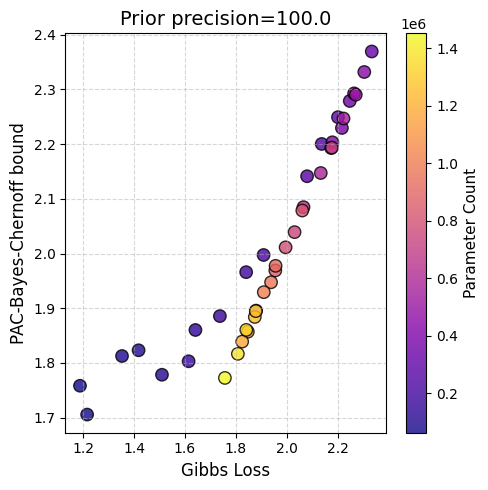

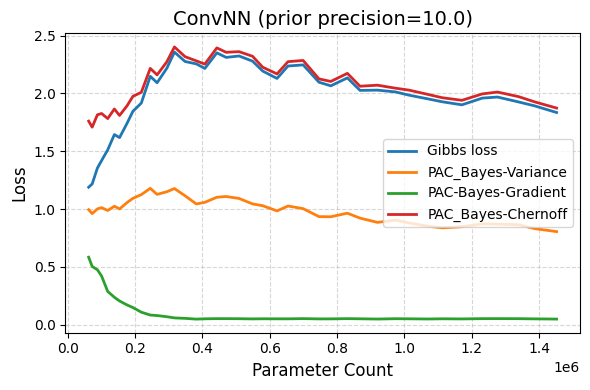

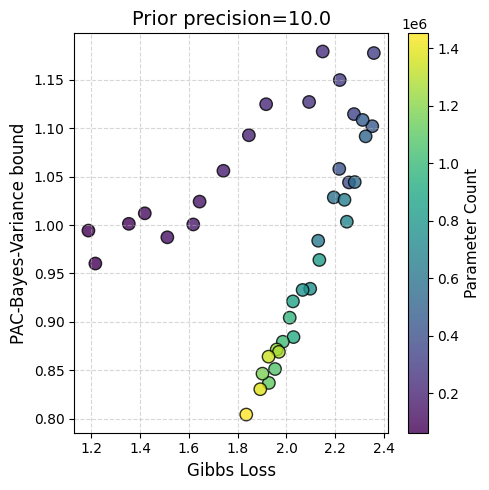

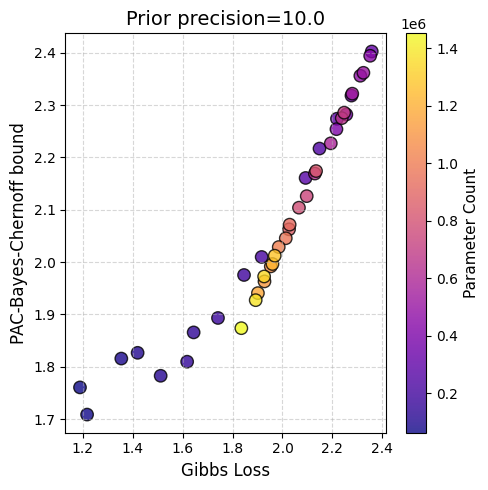

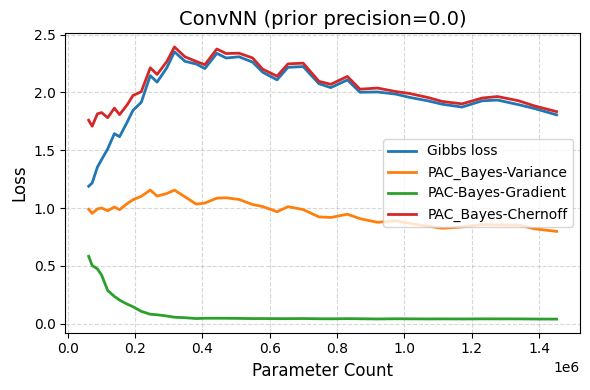

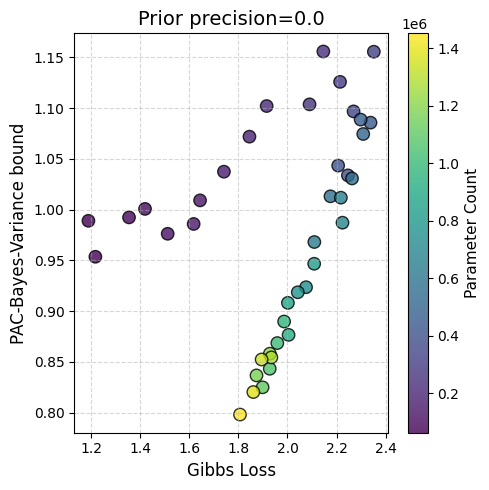

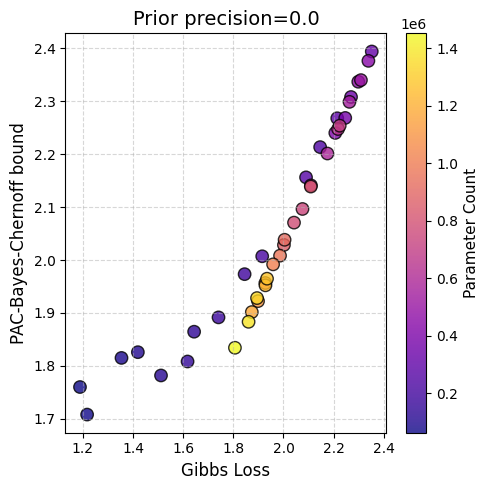

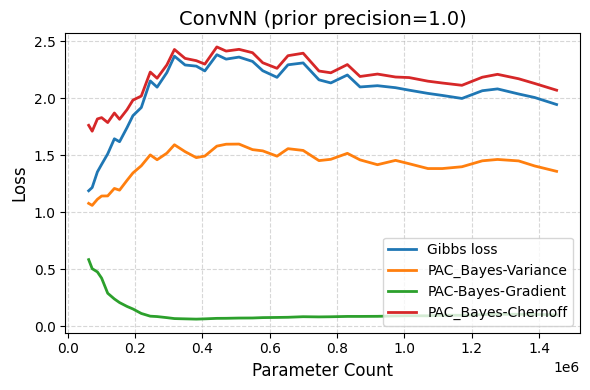

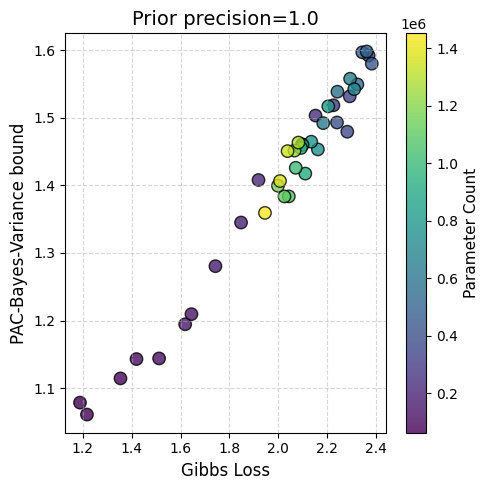

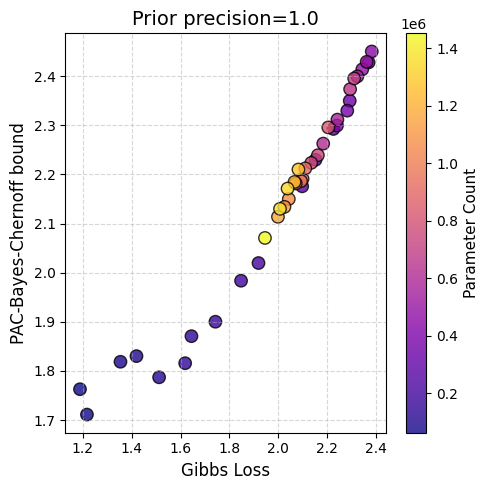

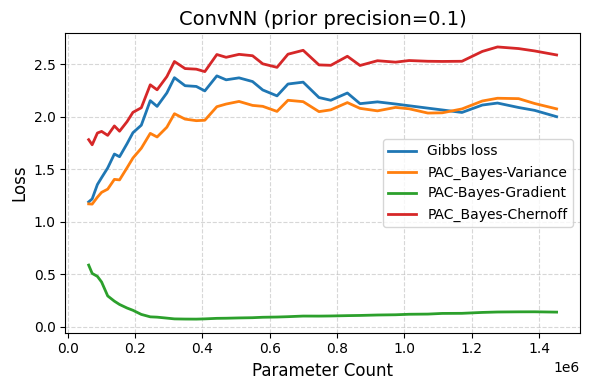

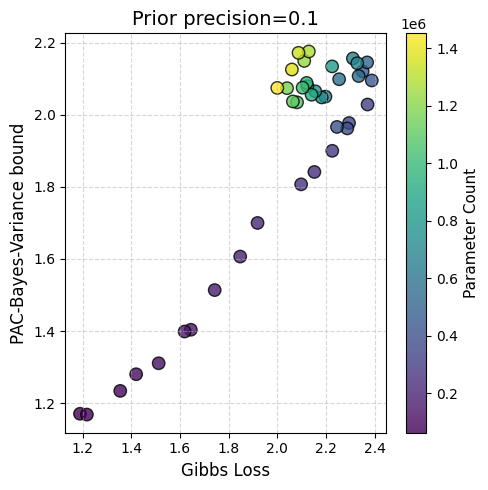

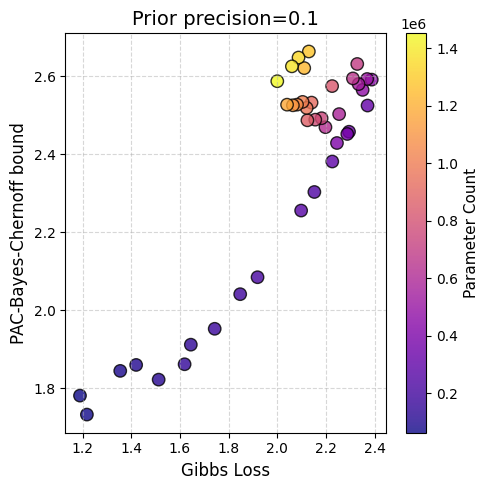

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

base_url = "https://raw.githubusercontent.com/Ludvins/PAC_Bayes_Chernoff_MLL/refs/heads/main/results/laplace_ConvNN_last_layer_kron_scalar_"
precisions = ["100.0", "10.0", "0.0", "1.0", "0.1"]
csv_files = [base_url + precision + "_results.csv" for precision in precisions]

x = 40
i = 0

all_filenames = []


for name in csv_files:
    df = pd.read_csv(name)

    bayes_loss = df['bayes loss'].values
    gibbs_loss = df['gibbs loss'].values
    bayes_loss_train = df['bayes loss train'].values
    gibbs_loss_train = df['gibbs loss train'].values
    inverse_rate = df['inverse rate'].values
    kl = df['normalized KL'].values * 50000
    variance = df['variance'].values
    parameters = df['parameters'].values
    input_grad = df['expected input-gradient norm'].values

    gibbs_gap  = gibbs_loss - gibbs_loss_train
    bayes_gap  = bayes_loss - bayes_loss_train
    jensen_gap = gibbs_gap - bayes_gap

    log_term = np.log(50000 / 0.05)
    PAC_variance = gibbs_loss_train + np.sqrt(2 * variance * (kl + log_term) / 49999)
    PAC_gradient = gibbs_loss_train + np.sqrt(2 * input_grad * (kl + log_term) / 49999)
    PAC_Chernoff = gibbs_loss_train + inverse_rate

    # ---- 1) Line plot: losses vs. parameter count
    fig1, ax1 = plt.subplots(figsize=(6, 4))
    ax1.plot(parameters[-x:], gibbs_loss[-x:], label='Gibbs loss', color='C0', linewidth=2)
    ax1.plot(parameters[-x:], PAC_variance[-x:], label='PAC_Bayes-Variance', color='C1', linewidth=2)
    ax1.plot(parameters[-x:], PAC_gradient[-x:], label='PAC-Bayes-Gradient', color='C2', linewidth=2)
    ax1.plot(parameters[-x:], PAC_Chernoff[-x:], label='PAC_Bayes-Chernoff', color='C3', linewidth=2)

    ax1.set_xlabel('Parameter Count', fontsize=12)
    ax1.set_ylabel('Loss', fontsize=12)
    ax1.set_title(f"ConvNN (prior precision={precisions[i]})", fontsize=14)
    ax1.grid(True, linestyle='--', alpha=0.5)
    ax1.legend(fontsize=10, loc='best')
    plt.tight_layout()
    fig1.savefig(f"lineplot_rho_{precisions[i]}.png", dpi=300)
    all_filenames.append(f"lineplot_rho_{precisions[i]}.png")
    plt.show()

    # ---- 2) Scatter: Gibbs loss vs. PAC-Variance bound
    fig2, ax2 = plt.subplots(figsize=(5, 5))
    sc2 = ax2.scatter(
        gibbs_loss[-x:], PAC_variance[-x:],
        c=parameters[-x:], cmap='viridis',
        s=80, edgecolors='k', alpha=0.8
    )
    ax2.set_xlabel('Gibbs Loss', fontsize=12)
    ax2.set_ylabel('PAC-Bayes-Variance bound',  fontsize=12)
    ax2.set_title(f"Prior precision={precisions[i]}", fontsize=14)
    ax2.grid(True, linestyle='--', alpha=0.5)

    cbar2 = plt.colorbar(sc2, ax=ax2)
    cbar2.set_label('Parameter Count', fontsize=11)
    plt.tight_layout()
    fig2.savefig(f"scatter_variance_rho_{precisions[i]}.png", dpi=300)
    all_filenames.append(f"scatter_variance_rho_{precisions[i]}.png")
    plt.show()

    # ---- 3) Scatter: Gibbs loss vs. PAC-Chernoff bound
    fig3, ax3 = plt.subplots(figsize=(5, 5))
    sc3 = ax3.scatter(
        gibbs_loss[-x:], PAC_Chernoff[-x:],
        c=parameters[-x:], cmap='plasma',
        s=80, edgecolors='k', alpha=0.8
    )
    ax3.set_xlabel('Gibbs Loss', fontsize=12)
    ax3.set_ylabel('PAC-Bayes-Chernoff bound', fontsize=12)
    ax3.set_title(f"Prior precision={precisions[i]}", fontsize=14)
    ax3.grid(True, linestyle='--', alpha=0.5)

    cbar3 = plt.colorbar(sc3, ax=ax3)
    cbar3.set_label('Parameter Count', fontsize=11)
    plt.tight_layout()
    fig3.savefig(f"scatter_chernoff_rho_{precisions[i]}.png", dpi=300)
    all_filenames.append(f"scatter_chernoff_rho_{precisions[i]}.png")
    plt.show()

    i+=1

for fname in all_filenames:
    files.download(fname)


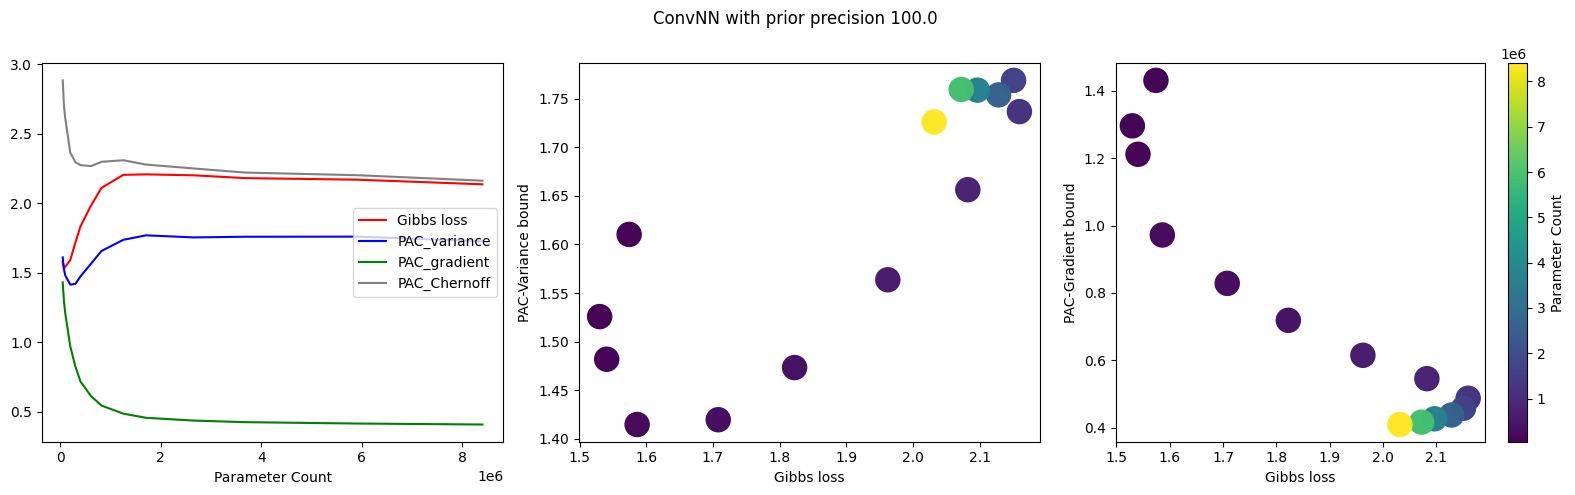

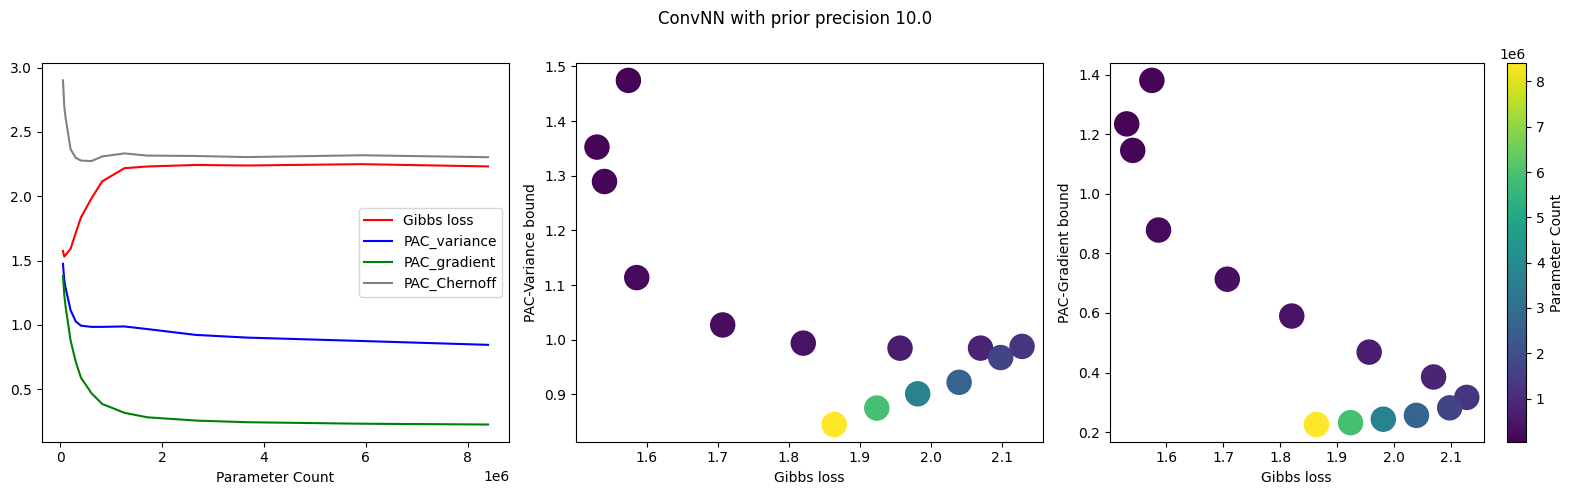

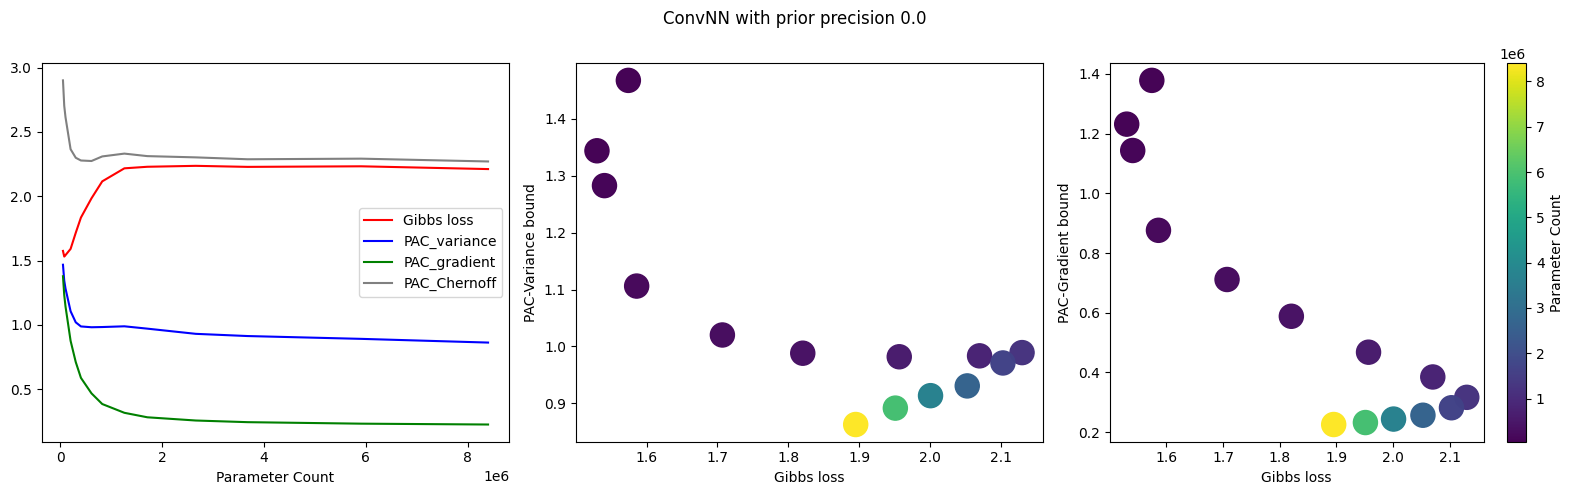

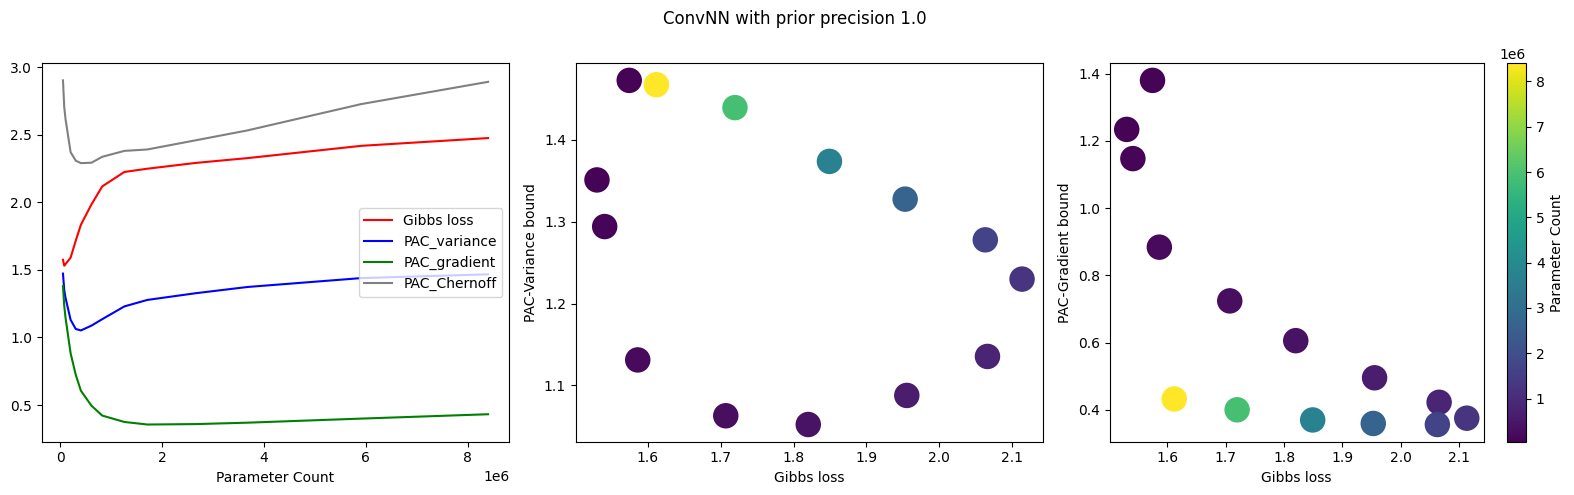

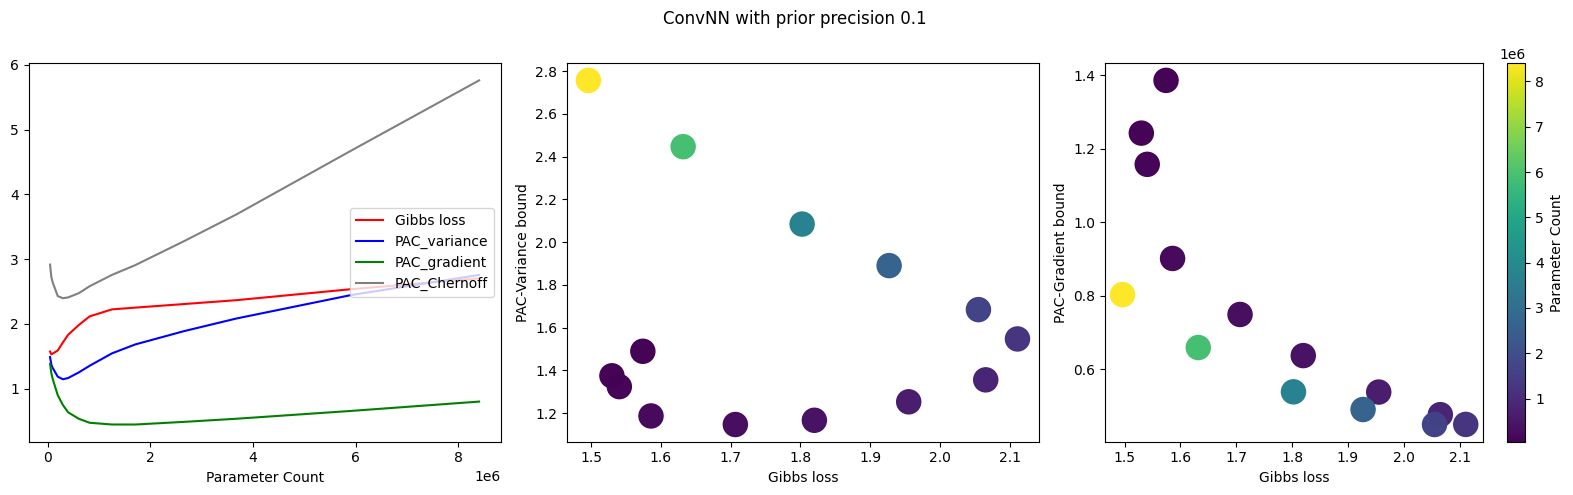

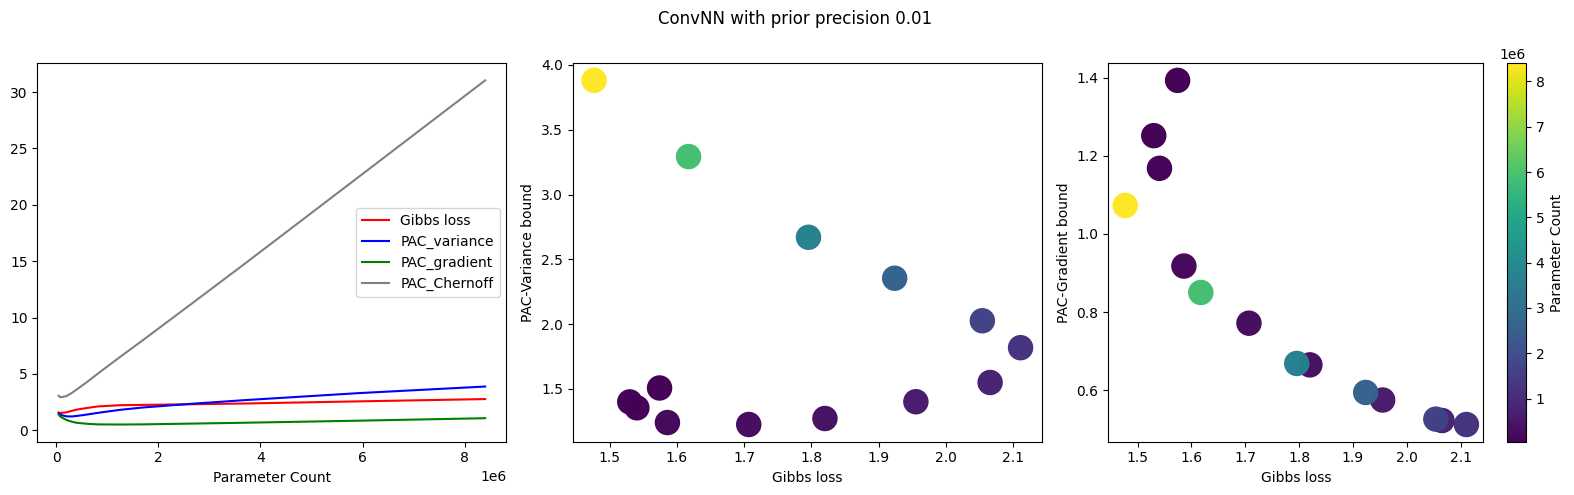

In [31]:
base_url = "https://raw.githubusercontent.com/Ludvins/PAC_Bayes_Chernoff_MLL/refs/heads/main/results/laplace_MLP_last_layer_kron_scalar_"
precisions = ["100.0", "10.0", "0.0", "1.0", "0.1", "0.01"]
csv_files = [base_url + precision + "_results.csv" for precision in precisions]

x = 14
i=0

for name in csv_files:
    df = pd.read_csv(name)

    bayes_loss = df['bayes loss'].values
    gibbs_loss = df['gibbs loss'].values
    bayes_loss_train = df['bayes loss train'].values
    gibbs_loss_train = df['gibbs loss train'].values
    inverse_rate = df['inverse rate'].values
    kl = df  ['normalized KL'].values*50000
    variance = df['variance'].values
    input_grad = df['expected input-gradient norm'].values
    parameters = df['parameters'].values

    gibbs_gap = gibbs_loss - gibbs_loss_train
    bayes_gap = bayes_loss - bayes_loss_train
    jensen_gap = gibbs_gap - bayes_gap


    PAC_variance = gibbs_loss_train + np.sqrt(2*variance*(kl + np.log(50000/0.05))/49999)
    PAC_gradient = gibbs_loss_train + np.sqrt(200*input_grad*(kl + np.log(50000/0.05))/49999)
    PAC_Chernoff = gibbs_loss_train + inverse_rate

    fig, ax1 = plt.subplots(1, 3, figsize=(16, 5))

    ax1[0].plot(parameters, gibbs_loss, label='Gibbs loss', color='red')
    ax1[0].plot(parameters, PAC_variance, label='PAC_variance', color='blue')
    ax1[0].plot(parameters, PAC_gradient, label='PAC_gradient', color='green')
    ax1[0].plot(parameters, PAC_Chernoff, label='PAC_Chernoff', color='grey')

    ax1[0].set_xlabel('Parameter Count')

    ax1[0].legend(loc='center right')

    scatter = ax1[1].scatter(bayes_loss[-x:], PAC_variance[-x:], c=parameters[-x:], cmap='viridis', s=300, alpha=0.99)
    ax1[1].set_ylabel('PAC-Variance bound')
    ax1[1].set_xlabel('Gibbs loss')

    scatter = ax1[2].scatter(bayes_loss[-x:], PAC_gradient[-x:], c=parameters[-x:], cmap='viridis', s=300, alpha=0.99)
    ax1[2].set_ylabel('PAC-Gradient bound')
    ax1[2].set_xlabel('Gibbs loss')

    cbar = plt.colorbar(scatter, ax=ax1[2])
    cbar.set_label('Parameter Count')

    fig.suptitle("ConvNN with prior precision " + precisions[i])
    fig.tight_layout()
    plt.show()
    i+=1

In [ ]:
uploaded = files.upload()

Saving ConvNN_train_results.csv to ConvNN_train_results.csv


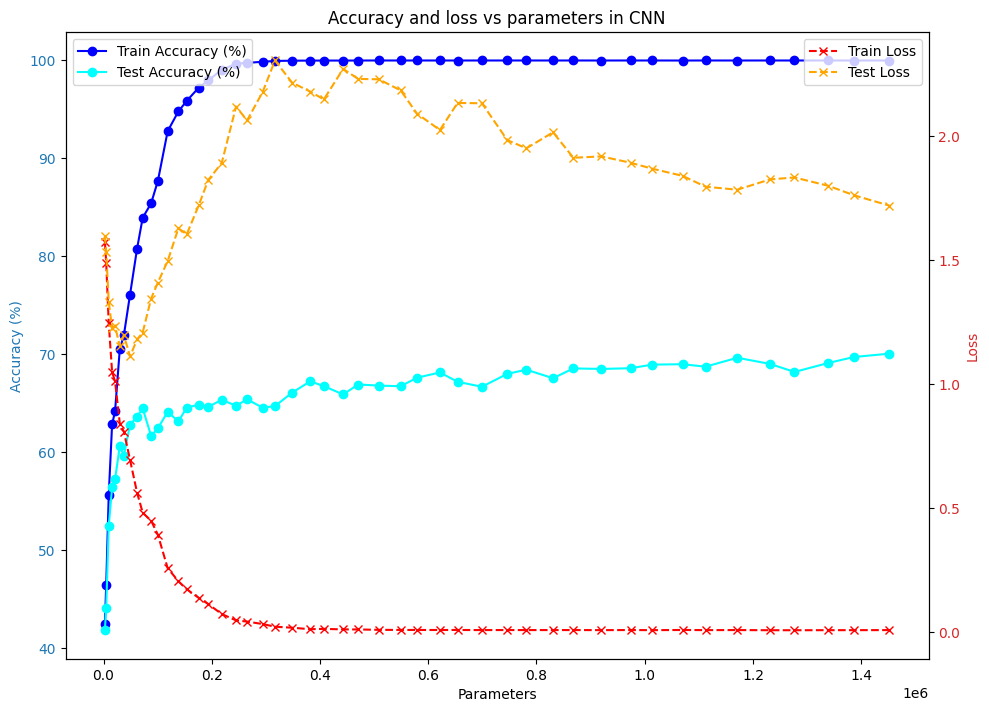

In [ ]:
for name in uploaded:
  df = pd.read_csv(name)

  train_accuracy = df['train accuracy (%)'].values
  test_accuracy = df['test accuracy (%)'].values
  train_loss = df['train loss'].values
  test_loss = df['test loss'].values
  parameters = df['parameters'].values

  # Plot train/test accuracy and train/test loss again
  fig, ax1 = plt.subplots(figsize=(10, 7))

  color = 'tab:blue'
  ax1.set_xlabel('Parameters')
  ax1.set_ylabel('Accuracy (%)', color=color)
  ax1.plot(parameters, train_accuracy, label='Train Accuracy (%)', color='blue', marker='o')
  ax1.plot(parameters, test_accuracy, label='Test Accuracy (%)', color='cyan', marker='o')
  ax1.tick_params(axis='y', labelcolor=color)
  ax1.legend(loc='upper left')

  ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

  color = 'tab:red'
  ax2.set_ylabel('Loss', color=color)  # we already handled the x-label with ax1
  ax2.plot(parameters, train_loss, label='Train Loss', color='red', linestyle='--', marker='x')
  ax2.plot(parameters, test_loss, label='Test Loss', color='orange', linestyle='--', marker='x')
  ax2.tick_params(axis='y', labelcolor=color)
  ax2.legend(loc='upper right')

  fig.tight_layout()  # otherwise the right y-label is slightly clipped
  plt.title('Accuracy and loss vs parameters in CNN')
  plt.show()